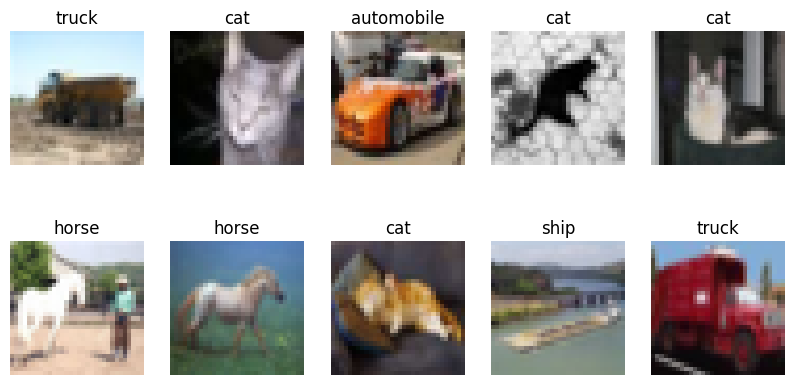

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3828 - loss: 1.6847

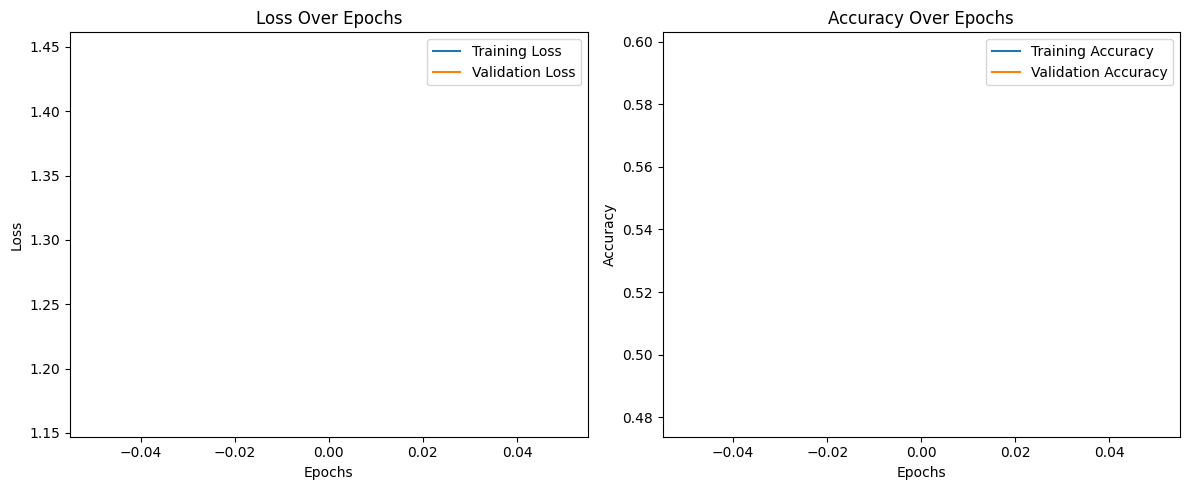

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.3828 - loss: 1.6845 - val_accuracy: 0.5971 - val_loss: 1.1613
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6088 - loss: 1.1274

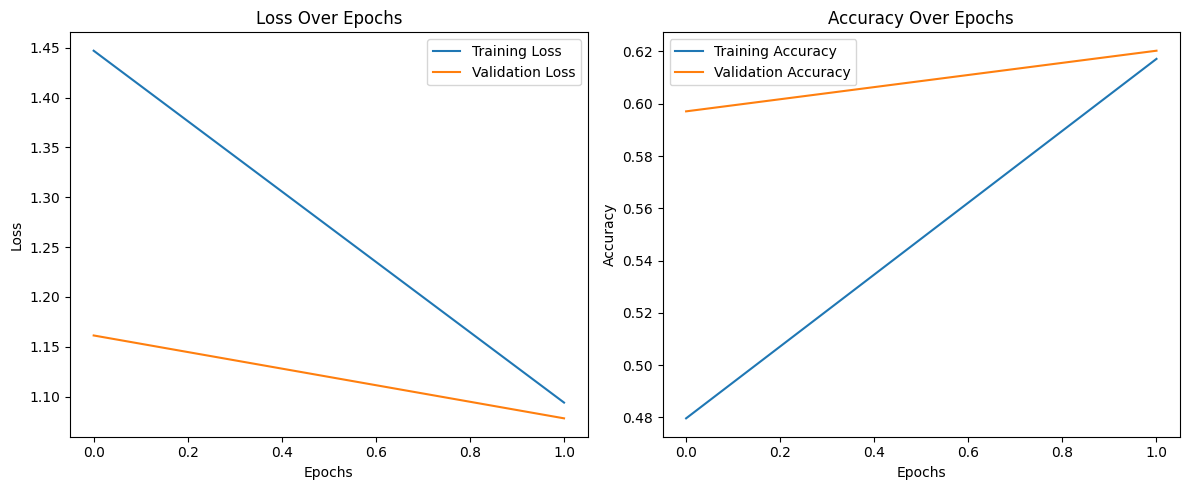

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.6088 - loss: 1.1274 - val_accuracy: 0.6203 - val_loss: 1.0781
Epoch 3/10
1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6580 - loss: 0.9838

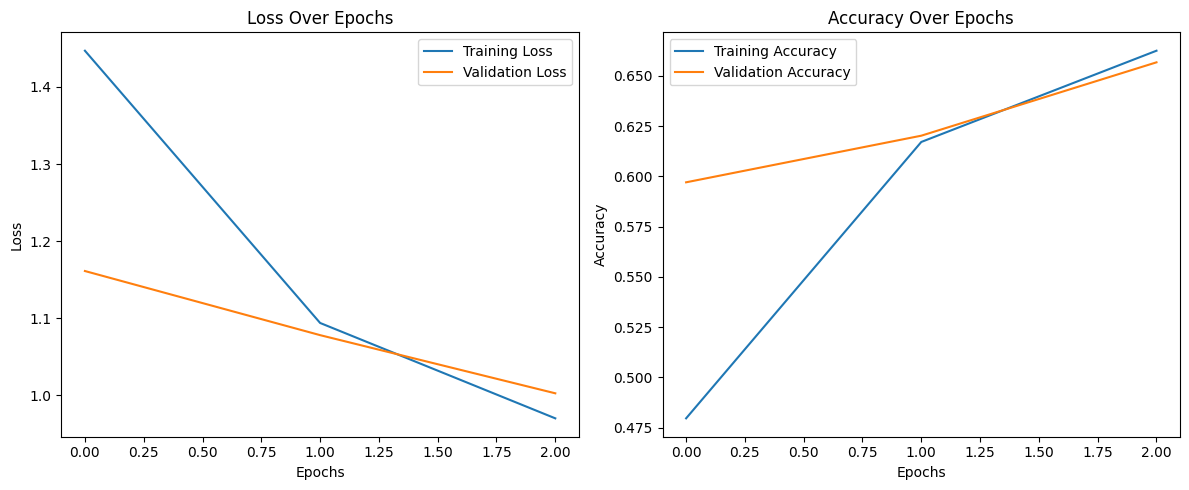

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 42ms/step - accuracy: 0.6580 - loss: 0.9838 - val_accuracy: 0.6568 - val_loss: 1.0027
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6871 - loss: 0.8965

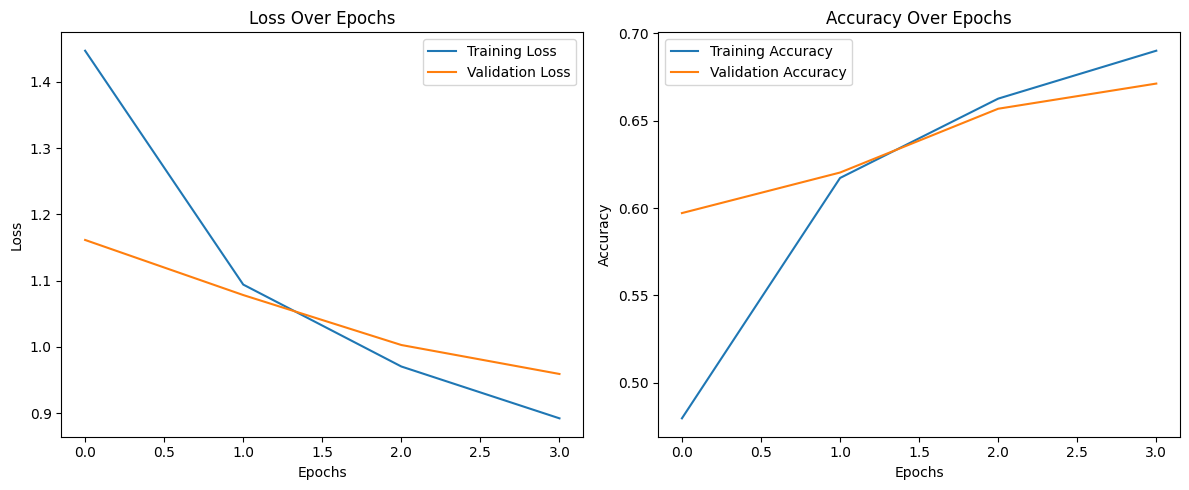

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.6871 - loss: 0.8965 - val_accuracy: 0.6712 - val_loss: 0.9589
Epoch 5/10
1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7133 - loss: 0.8175

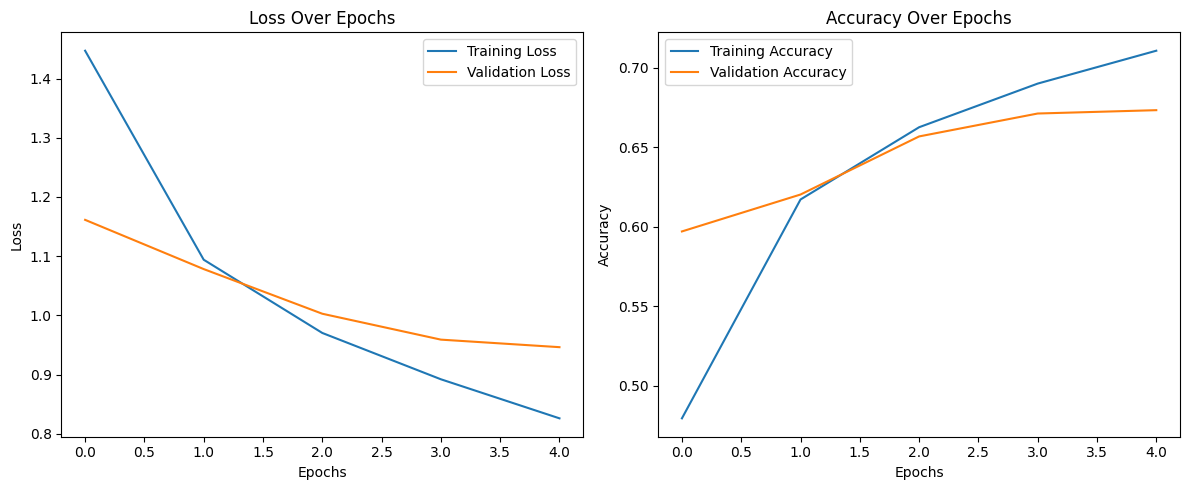

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/step - accuracy: 0.7133 - loss: 0.8175 - val_accuracy: 0.6733 - val_loss: 0.9462
Epoch 6/10
1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7322 - loss: 0.7634

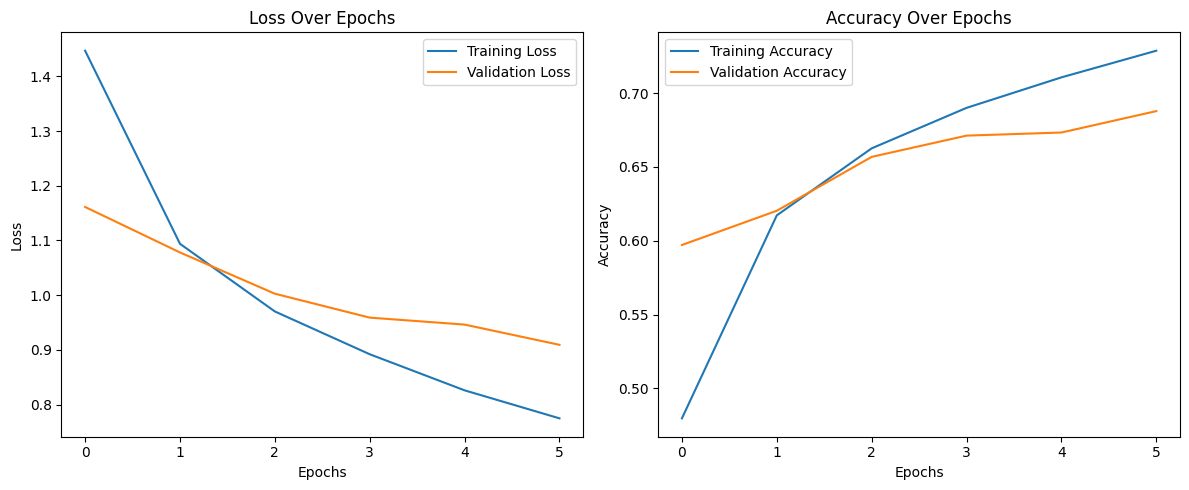

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 45ms/step - accuracy: 0.7322 - loss: 0.7634 - val_accuracy: 0.6878 - val_loss: 0.9092
Epoch 7/10
1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7544 - loss: 0.7024

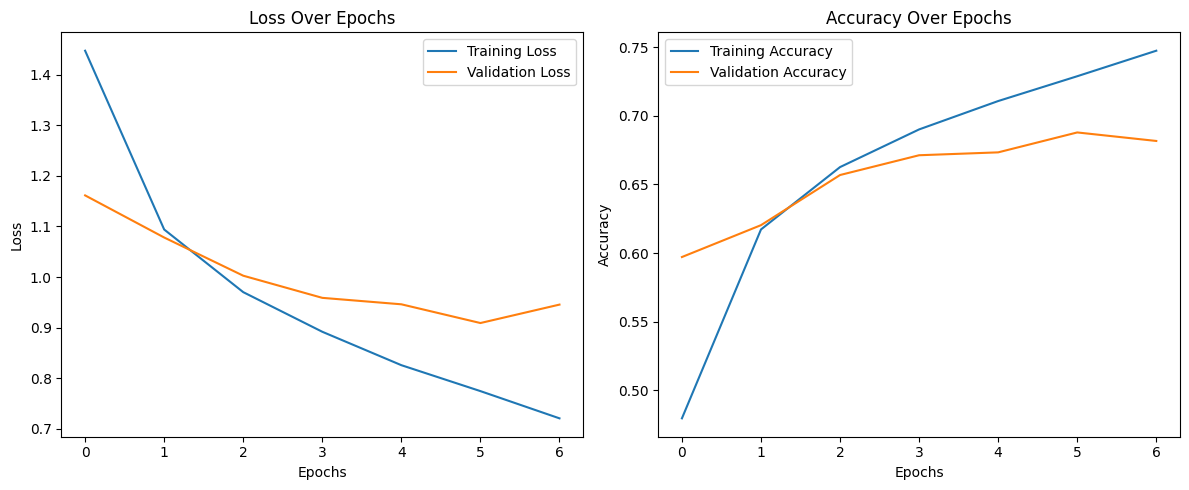

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 44ms/step - accuracy: 0.7544 - loss: 0.7024 - val_accuracy: 0.6816 - val_loss: 0.9456
Epoch 8/10
1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7707 - loss: 0.6573

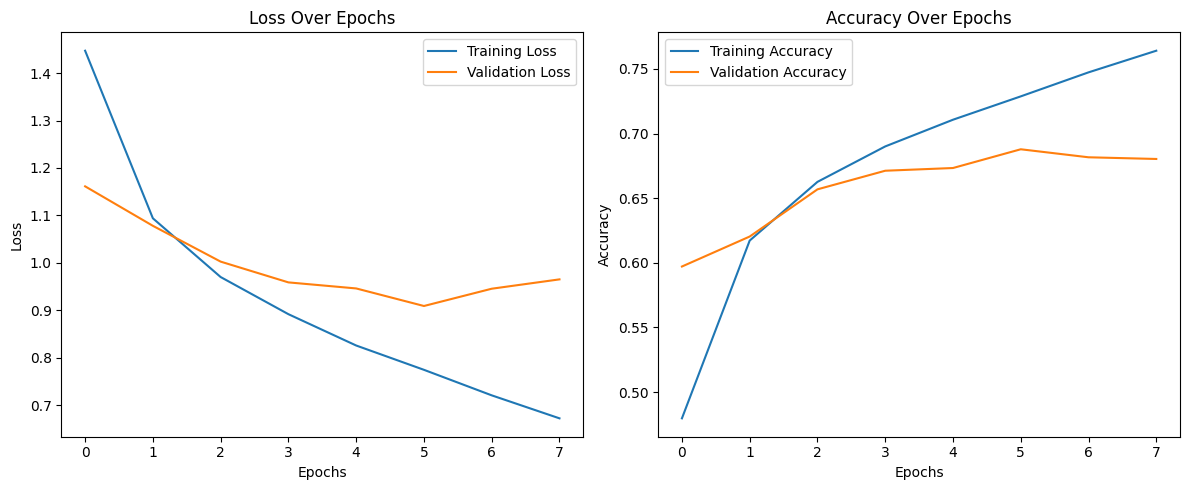

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - accuracy: 0.7706 - loss: 0.6573 - val_accuracy: 0.6803 - val_loss: 0.9653
Epoch 9/10
1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7865 - loss: 0.6126

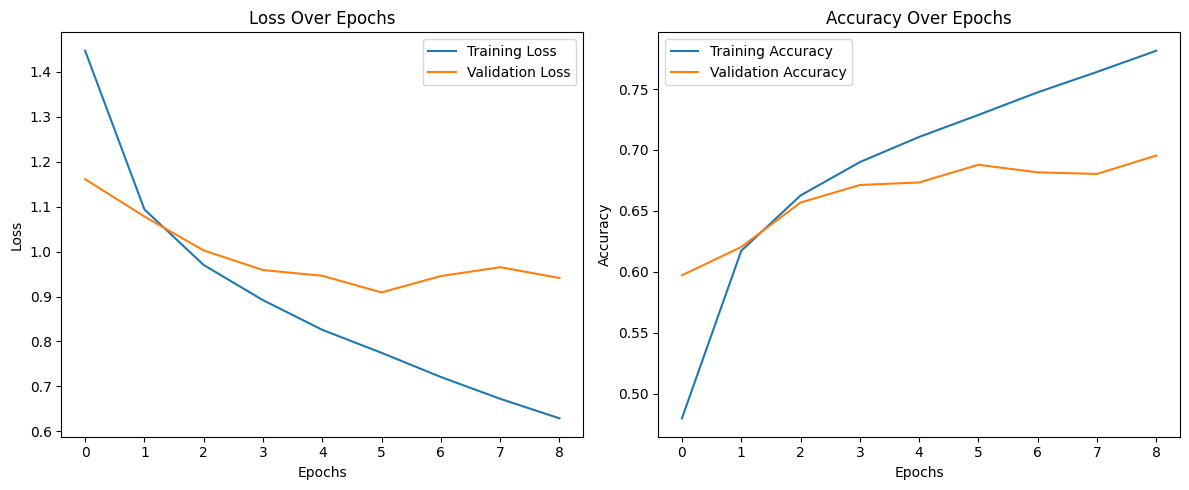

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.7865 - loss: 0.6126 - val_accuracy: 0.6954 - val_loss: 0.9413
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8020 - loss: 0.5633

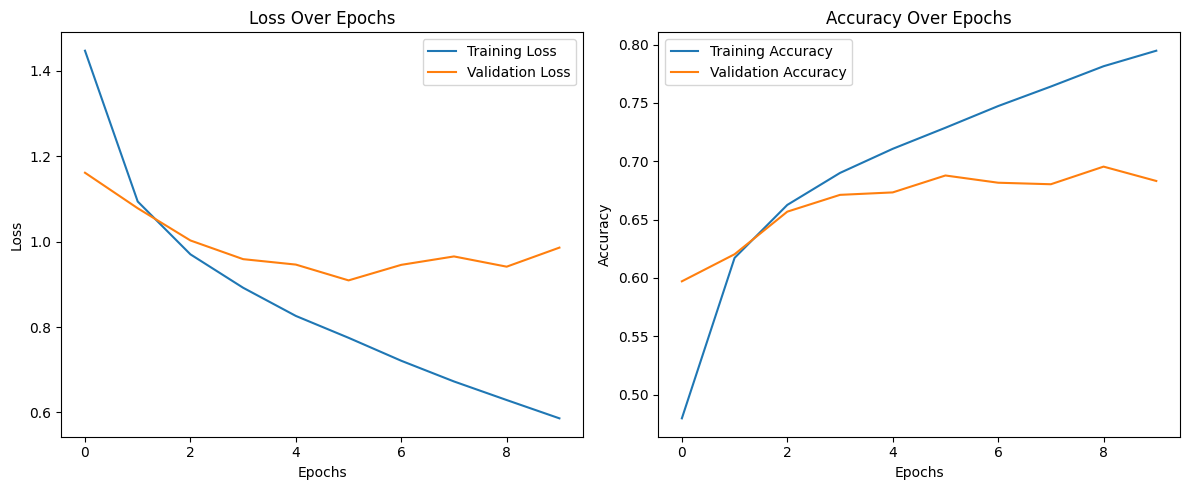

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.8020 - loss: 0.5633 - val_accuracy: 0.6831 - val_loss: 0.9859


ValueError: The layer sequential_6 has never been called and thus has no defined input.

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import tensorflow as tf

# CIFAR-10 데이터셋 로드 및 전처리
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# CIFAR-10 클래스 이름 정의
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# 랜덤 이미지 10개 선택 및 시각화
def plot_images(images, labels, class_names, num_images=10):
    plt.figure(figsize=(10, 5))
    random_indices = np.random.choice(len(images), num_images, replace=False)  # 랜덤 인덱스 선택
    for i, idx in enumerate(random_indices):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[idx])
        plt.title(class_names[labels[idx][0]])  # 이미지의 라벨로 클래스 이름 표시
        plt.axis('off')  # 축 숨기기
    plt.show()

# 훈련 데이터에서 랜덤으로 10개의 이미지 선택하여 시각화
plot_images(x_train, y_train, class_names)

# 모델 정의
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 임의의 데이터로 모델을 실행하여 모델이 호출되도록 함
model(x_train[:1])  # 훈련 데이터의 첫 번째 샘플을 사용하여 호출

# 학습 과정 시각화를 위한 데이터 저장
history = {'loss': [], 'val_loss': [], 'accuracy': [], 'val_accuracy': []}

# 학습 진행 중간중간 시각화 콜백 함수
class TrainingVisualization(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        # 로그 데이터 저장
        history['loss'].append(logs['loss'])
        history['val_loss'].append(logs['val_loss'])
        history['accuracy'].append(logs['accuracy'])
        history['val_accuracy'].append(logs['val_accuracy'])

        # 실시간 그래프 업데이트
        plt.figure(figsize=(12, 5))

        # 손실 그래프
        plt.subplot(1, 2, 1)
        plt.plot(history['loss'], label='Training Loss')
        plt.plot(history['val_loss'], label='Validation Loss')
        plt.title('Loss Over Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        # 정확도 그래프
        plt.subplot(1, 2, 2)
        plt.plot(history['accuracy'], label='Training Accuracy')
        plt.plot(history['val_accuracy'], label='Validation Accuracy')
        plt.title('Accuracy Over Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.tight_layout()
        plt.show()

# 모델 학습
model.fit(x_train, y_train,
          epochs=10,
          validation_data=(x_test, y_test),
          callbacks=[TrainingVisualization()])

# 중간 출력 특징맵 시각화
layer_outputs = [layer.output for layer in model.layers if isinstance(layer, Conv2D)]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

def visualize_feature_maps(image):
    image_batch = np.expand_dims(image, axis=0)
    activations = activation_model.predict(image_batch)

    for i, activation in enumerate(activations):
        num_filters = activation.shape[-1]
        n_cols = num_filters // 8

        fig, axes = plt.subplots(n_cols, 8, figsize=(15, 15))
        fig.suptitle(f'Feature Maps from Layer {i+1}', fontsize=16)

        for col in range(n_cols):
            for row in range(8):
                if col * 8 + row < num_filters:
                    ax = axes[col, row]
                    ax.matshow(activation[0, :, :, col * 8 + row], cmap='viridis')
                    ax.axis('off')
        plt.show()

# 이미지 하나의 특징맵 시각화 (테스트 이미지 사용)
visualize_feature_maps(x_test[0])
